In [63]:
## Tutorial from Machine Learnia youtube channel: https://www.youtube.com/watch?v=cpltYCNLIt0
## Polynomial model

import numpy as np 
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset

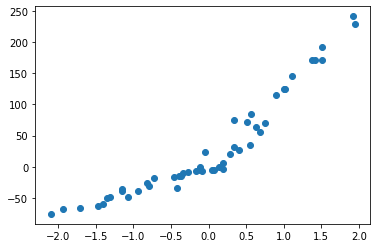

In [64]:
x, y = make_regression(n_samples= 50, n_features=1, noise=10)
y = y + abs(y/2) 
plt.scatter(x,y)

In [65]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(50, 1)
(50, 1)


In [66]:
# matrix x
X = np.hstack((x,np.ones(x.shape)))
X = np.hstack((x**2,X))
print(X.shape)
print(X)

(50, 3)
[[ 7.41618859e-03 -8.61172955e-02  1.00000000e+00]
 [ 1.15215924e+00 -1.07338681e+00  1.00000000e+00]
 [ 3.78746040e+00  1.94613987e+00  1.00000000e+00]
 [ 2.06541891e-01 -4.54468801e-01  1.00000000e+00]
 [ 1.97142698e+00 -1.40407513e+00  1.00000000e+00]
 [ 2.28662878e+00  1.51216030e+00  1.00000000e+00]
 [ 2.91352407e+00 -1.70690482e+00  1.00000000e+00]
 [ 1.57977878e-03  3.97464311e-02  1.00000000e+00]
 [ 1.15938549e-01 -3.40497502e-01  1.00000000e+00]
 [ 3.13764744e-01  5.60147073e-01  1.00000000e+00]
 [ 2.58883438e-01  5.08805895e-01  1.00000000e+00]
 [ 9.97745334e-01  9.98872031e-01  1.00000000e+00]
 [ 8.73960893e-01 -9.34858755e-01  1.00000000e+00]
 [ 2.15537270e+00 -1.46811876e+00  1.00000000e+00]
 [ 8.16558982e-02  2.85754962e-01  1.00000000e+00]
 [ 6.63980448e-01 -8.14849954e-01  1.00000000e+00]
 [ 3.08124891e-01  5.55089985e-01  1.00000000e+00]
 [ 1.33723247e+00 -1.15638768e+00  1.00000000e+00]
 [ 2.00702982e+00  1.41669680e+00  1.00000000e+00]
 [ 3.90617205e-02  1.97

In [67]:
# random initialization of vector theta
theta = np.random.randn(3,1)
print(theta.shape)
print(theta)

(3, 1)
[[-1.84156227]
 [-0.05928172]
 [ 0.77063325]]


# 2. Model

In [68]:
def model(X, theta):
    return X.dot(theta)

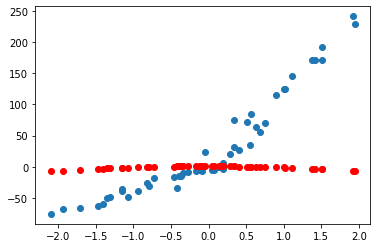

In [69]:
# compare initial model with data
plt.scatter(x,y)
plt.scatter(x, model(X, theta), c='r')

# 3. Cost function

In [70]:
def cost_function(X, y, theta):
    m= len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [71]:
cost_function(X, y, theta)

3804.6218133445927

# 4. Gradient and Gradient descent

In [72]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [73]:
def gradient_descent(X, y, theta, learning_rate, n_it):
    cost_history = np.zeros(n_it)
    for i in range(0, n_it):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# 5. Fit the model

In [74]:
theta_final, cost_hist = gradient_descent(X, y, theta, learning_rate=0.01, n_it=500)
theta_final

array([[21.57900794],
       [78.37292327],
       [10.24952018]])

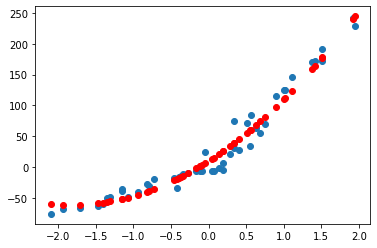

In [75]:
# compare fit model with data
predictions = model(X, theta_final)
plt.scatter(x,y)
plt.scatter(x, predictions, c='r')

# 6. Learning curve

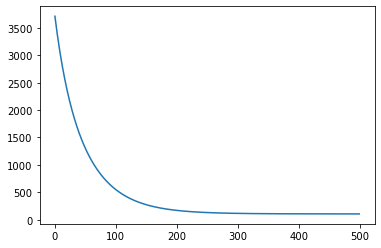

In [76]:
plt.plot(range(500), cost_hist)

# 7. Evaluation with R²

In [77]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [78]:
coef_determination(y, predictions)

0.9681978833636544